# Encuesta funcionarios públicos

## Preparación de ambiente

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from datetime import date
import warnings

warnings.filterwarnings("ignore")

## importar datos

In [65]:
df=pd.read_excel('BBDD Todos_rev.xlsx')
mt=pd.read_excel('Maestros.xlsx')

mt_indices=pd.read_excel('Maestros.xlsx',sheet_name='indices')
mt_servicios=pd.read_excel('Maestros.xlsx',sheet_name='servicios')

df=pd.merge(df,mt_indices,how='left',on='Indice')
df=pd.merge(df,mt_servicios,how='left',on='Servicio')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272168 entries, 0 to 272167
Data columns (total 10 columns):
 #   Column                                     Non-Null Count   Dtype 
---  ------                                     --------------   ----- 
 0   Servicio                                   272168 non-null  object
 1   Caracteristica de Comparacion              272168 non-null  object
 2   Valor de la Caracteristica de Comparacion  272168 non-null  object
 3   Indice                                     272168 non-null  object
 4   Indicador                                  272168 non-null  object
 5   Tipo                                       272168 non-null  object
 6   Resultado                                  272168 non-null  object
 7   Codificacion                               272168 non-null  object
 8   Dimensión                                  272168 non-null  object
 9   Sector                                     272168 non-null  object
dtypes: object(10)
memory

In [25]:
df['Sector'].unique()

array(['Todos', nan, 'Ministerio de Obras Públicas',
       'Ministerio de Salud', 'Ministerio de Vivienda y Urbanismo',
       'Ministerio del Deporte',
       'Ministerio de Desarrollo Social y Familia', 'Gobierno Local',
       'Ministerio del Interior y Seguridad Pública',
       'Ministerio del Medio Ambiente',
       'Ministerio del Trabajo y Previsión Social',
       'Ministerio de Economía, Fomento y Turismo',
       'Ministerio de Agricultura', 'Ministerio de Educación',
       'Ministerio de Energía',
       'Ministerio de Justicia y Derechos Humanos',
       'Ministerio de Hacienda',
       'Ministerio de las Culturas, las Artes y el Patrimonio'],
      dtype=object)

In [66]:
min_serv=df[['Sector', 'Servicio']].drop_duplicates()
min_serv[df.Sector.isna()]

,Sector,Servicio


In [71]:
df_resumen_indicadores=df.query("`Caracteristica de Comparacion`=='Todos' & Tipo=='Indice' & Resultado!='Respuentas Insuffientes (<10)'") #`Indice` == 'Satisfaccion Laboral' &  `Servicio`=='Todos' &
df_resumen_indicadores
#df_resumen_indicaores.query("Servicio=='Comision Chilena del Cobre'")

,Servicio,Caracteristica de Comparacion,Valor de la Caracteristica de Comparacion,Indice,Indicador,Tipo,Resultado,Codificacion,Dimensión,Sector
0,Todos,Todos,Todos,Compromiso Organizacional,Compromiso Organizacional,Indice,69,Indice,Actitudes Laborales,Todos
8,Todos,Todos,Todos,Diversidad e Inclusion,Diversidad e Inclusion,Indice,67,Indice,Actitudes Laborales,Todos
11,Todos,Todos,Todos,Gestion de Diversidad e Inclusion,Gestion de Diversidad e Inclusion,Indice,46,Indice,Prácticas de Gestión de Personas,Todos
20,Todos,Todos,Todos,Trabajo en Equipo,Trabajo en Equipo,Indice,80,Indice,Prácticas de Gestión de Personas,Todos
23,Todos,Todos,Todos,Motivacion con el Servicio Publico,Motivacion con el Servicio Publico,Indice,83,Indice,Actitudes Laborales,Todos
...,...,...,...,...,...,...,...,...,...,...
270098,Servicio Nacional de Geologia y Mineria,Todos,Todos,Desarrollo de Competencias,Desarrollo de Competencias,Indice,67,Indice,Actitudes Laborales,Ministerio de Mineria
270103,Servicio Nacional de Geologia y Mineria,Todos,Todos,Capacitacion,Capacitacion,Indice,46,Indice,Prácticas de Gestión de Personas,Ministerio de Mineria
270107,Servicio Nacional de Geologia y Mineria,Todos,Todos,Confianza,Confianza,Indice,55,Indice,Actitudes Laborales,Ministerio de Mineria
270108,Servicio Nacional de Geologia y Mineria,Todos,Todos,Intencion de Permanecer,Intencion de Permanecer,Indice,64,Indice,Actitudes Laborales,Ministerio de Mineria


# Promedios por Sector

In [74]:
sectores=df_resumen_indicadores[df_resumen_indicadores['Sector']!='Todos'].Sector.unique()
sectores

array(['Ministerio de Defensa Nacional', 'Ministerio de Obras Publicas',
       'Ministerio de Desarrollo Social y Familia',
       'Ministerio de Hacienda', 'Ministerio de Relaciones Exteriores',
       'Ministerio de Salud',
       'Ministerio de Transportes y Telecomunicaciones',
       'Ministerio de Vivienda y Urbanismo', 'Ministerio del Deporte',
       'Gobierno Local', 'Ministerio del Interior y Seguridad Publica',
       'Ministerio de Agricultura', 'Ministerio del Medio Ambiente',
       'Ministerio del Trabajo y Prevision Social',
       'Ministerio Secretaria General de Gobierno',
       'Ministerio Secretaria General de la Presidencia',
       'Presidencia de la Republica',
       'Ministerio de Economia, Fomento y Turismo',
       'Ministerio de Educacion', 'Ministerio de Energia',
       'Ministerio de Justicia y Derechos Humanos',
       'Ministerio de Ciencia, Tecnologia, Conocimiento e Innovacion',
       'Ministerio de la Mujer y la Equidad de Genero',
       'Minist

In [ ]:
df_resumen_indicadores[df_resumen_indicadores['Sector']=f'{sector}'].groupby(df_resumen_indicaores['Indice'])['Resultado'].mean().reset_index()

In [78]:
sectores=df_resumen_indicadores[df_resumen_indicadores['Sector']!='Todos'].Sector.unique()
i=0
for sector in sectores:
    df_promedio_sector=df_resumen_indicadores[df_resumen_indicadores['Sector']==f'{sector}'].groupby(df_resumen_indicaores['Indice'])['Resultado'].mean().reset_index()
    df_promedio_sector['Sector']=sector
    if i==0:
        df_promedios_todos=df_promedio_sector
    else:
        df_promedios_todos=pd.concat(df_promedios_todos,df_promedio_sector)
    i+=1
df_promedios_todos


TypeError: concat() takes 1 positional argument but 2 were given

In [79]:
sectores = df_resumen_indicadores[df_resumen_indicadores['Sector'] != 'Todos']['Sector'].unique()
df_promedios_todos = pd.DataFrame()

for sector in sectores:
    df_promedio_sector = df_resumen_indicadores[df_resumen_indicadores['Sector'] == sector].groupby('Indice')['Resultado'].mean().reset_index()
    df_promedio_sector['Sector'] = sector
    df_promedios_todos = pd.concat([df_promedios_todos, df_promedio_sector])

df_promedios_todos.reset_index(drop=True, inplace=True)


In [89]:
columnas_drop={'Caracteristica de Comparacion','Valor de la Caracteristica de Comparacion','Indicador','Codificacion','Dimensión','Servicio','Tipo'}
df_promedios=df.query("`Servicio`=='Todos' & `Caracteristica de Comparacion`=='Todos' & Tipo=='Indice'").drop(columns=columnas_drop)
df_promedios_todos=pd.concat([df_promedios_todos, df_promedios])


## Gráfico inicial (panorámica)

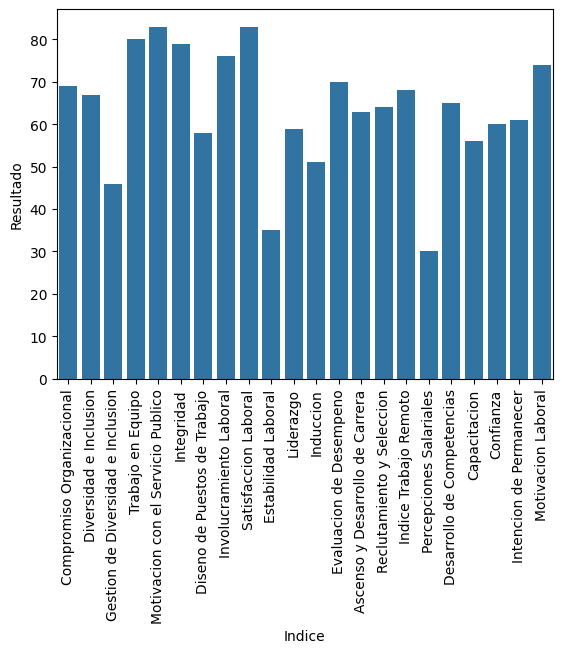

In [9]:

sns.barplot(x='Indice', y='Resultado', data=df_resumen_indicadores)
xticks = plt.xticks(rotation=90)
plt.show()

In [68]:
df_resumen_indicaores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, 194742 to 225704
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Servicio                                   304 non-null    object
 1   Caracteristica de Comparacion              304 non-null    object
 2   Valor de la Caracteristica de Comparacion  304 non-null    object
 3   Indice                                     304 non-null    object
 4   Indicador                                  304 non-null    object
 5   Tipo                                       304 non-null    object
 6   Resultado                                  304 non-null    object
 7   Codificacion                               304 non-null    object
 8   Dimensión                                  304 non-null    object
 9   Sector                                     304 non-null    object
dtypes: object(10)
memory usage: 26.1+ K

## Graficos por sector / servicio
el gráfico de sector con promedio simple



In [11]:
df.query("`Servicio`=='Todos' & `Caracteristica de Comparacion`=='Todos' & Tipo=='Indice'") #`Indice` == 'Satisfaccion Laboral' & 

,Servicio,Caracteristica de Comparacion,Valor de la Caracteristica de Comparacion,Indice,Indicador,Tipo,Resultado,Codificacion
0,Todos,Todos,Todos,Compromiso Organizacional,Compromiso Organizacional,Indice,69,Indice
8,Todos,Todos,Todos,Diversidad e Inclusion,Diversidad e Inclusion,Indice,67,Indice
11,Todos,Todos,Todos,Gestion de Diversidad e Inclusion,Gestion de Diversidad e Inclusion,Indice,46,Indice
20,Todos,Todos,Todos,Trabajo en Equipo,Trabajo en Equipo,Indice,80,Indice
23,Todos,Todos,Todos,Motivacion con el Servicio Publico,Motivacion con el Servicio Publico,Indice,83,Indice
32,Todos,Todos,Todos,Integridad,Integridad,Indice,79,Indice
33,Todos,Todos,Todos,Diseno de Puestos de Trabajo,Diseno de Puestos de Trabajo,Indice,58,Indice
45,Todos,Todos,Todos,Involucramiento Laboral,Involucramiento Laboral,Indice,76,Indice
46,Todos,Todos,Todos,Satisfaccion Laboral,Estoy satisfecho/a con mi trabajo,Indice,83,% de encuestados que selecciona opciones de ac...
48,Todos,Todos,Todos,Estabilidad Laboral,Estabilidad Laboral,Indice,35,Indice


## grafico de comparación entre mejores y peores por indice

In [13]:
indices=df['Indice'].unique()
Maximo=[]
Minimo=[]
Servicio_Maximo=[]
Servicio_Minimo=[]
Indice=[]
for indice in indices:
    datos_x_indice=df.query(f"Servicio!='Todos' & `Caracteristica de Comparacion`=='Todos' & Tipo=='Indice' & Indice=='{indice}' & Resultado!='Respuentas Insuffientes (<10)'")
    for i in range(datos_x_indice.shape[0]):
        if i==0:
            ResultadoMaximo=datos_x_indice.iloc[i]['Resultado']
            ServicioMaximo=datos_x_indice.iloc[i]['Servicio']
            ResultadoMinimo=datos_x_indice.iloc[i]['Resultado']
        else:
            if datos_x_indice.iloc[i]['Resultado']>ResultadoMaximo:
                ResultadoMaximo=datos_x_indice.iloc[i]['Resultado']
                ServicioMaximo=datos_x_indice.iloc[i]['Servicio']
            if datos_x_indice.iloc[i]['Resultado']<ResultadoMinimo:
                ResultadoMinimo=datos_x_indice.iloc[i]['Resultado']
                ServicioMinimo=datos_x_indice.iloc[i]['Servicio']
    #display(f"El servicio con mayor {indice} es {ServicioMaximo} con {ResultadoMaximo}")
    #display(f"El servicio con menor {indice} es {ServicioMinimo} con {ResultadoMinimo}")
    Maximo.append(ResultadoMaximo)
    Minimo.append(ResultadoMinimo)
    Servicio_Maximo.append(ServicioMaximo)
    Servicio_Minimo.append(ServicioMinimo)
    Indice.append(indice)
df_max=pd.DataFrame({'Indice':Indice,'Categoria':'Maximo','Resultado':Maximo,'Servicio':Servicio_Maximo})
df_min=pd.DataFrame({'Indice':Indice,'Categoria':'Minimo','Resultado':Minimo,'Servicio':Servicio_Minimo})
df_max_min=pd.concat([df_max,df_min])
df_max_min.sort_values(by=['Indice','Categoria'],inplace=True)
df_max_min['Row_number'] = np.where(df_max_min.reset_index().index==0,0,df_max_min.reset_index().index*0.5)-0.3
df_max_min


,Indice,Categoria,Resultado,Servicio,Row_number
13,Ascenso y Desarrollo de Carrera,Maximo,82,Instituto Antartico Chileno,-0.3
13,Ascenso y Desarrollo de Carrera,Minimo,50,Comision Administradora del Sistema de Credito...,0.2
18,Capacitacion,Maximo,82,Direccion de Compras y Contratacion Publica,0.7
18,Capacitacion,Minimo,36,Municipalidad de Cerrillos,1.2
0,Compromiso Organizacional,Maximo,90,Fiscalia Nacional Economica,1.7
0,Compromiso Organizacional,Minimo,37,Instituto Nacional de Desarrollo Sustentable d...,2.2
19,Confianza,Maximo,86,Unidad Administradora de los Tribunales Tribut...,2.7
19,Confianza,Minimo,38,Servicio Administrativo del Gobierno Regional ...,3.2
17,Desarrollo de Competencias,Maximo,79,Direccion de Compras y Contratacion Publica,3.7
17,Desarrollo de Competencias,Minimo,56,Servicio Local de Educacion Publica Magallanes,4.2


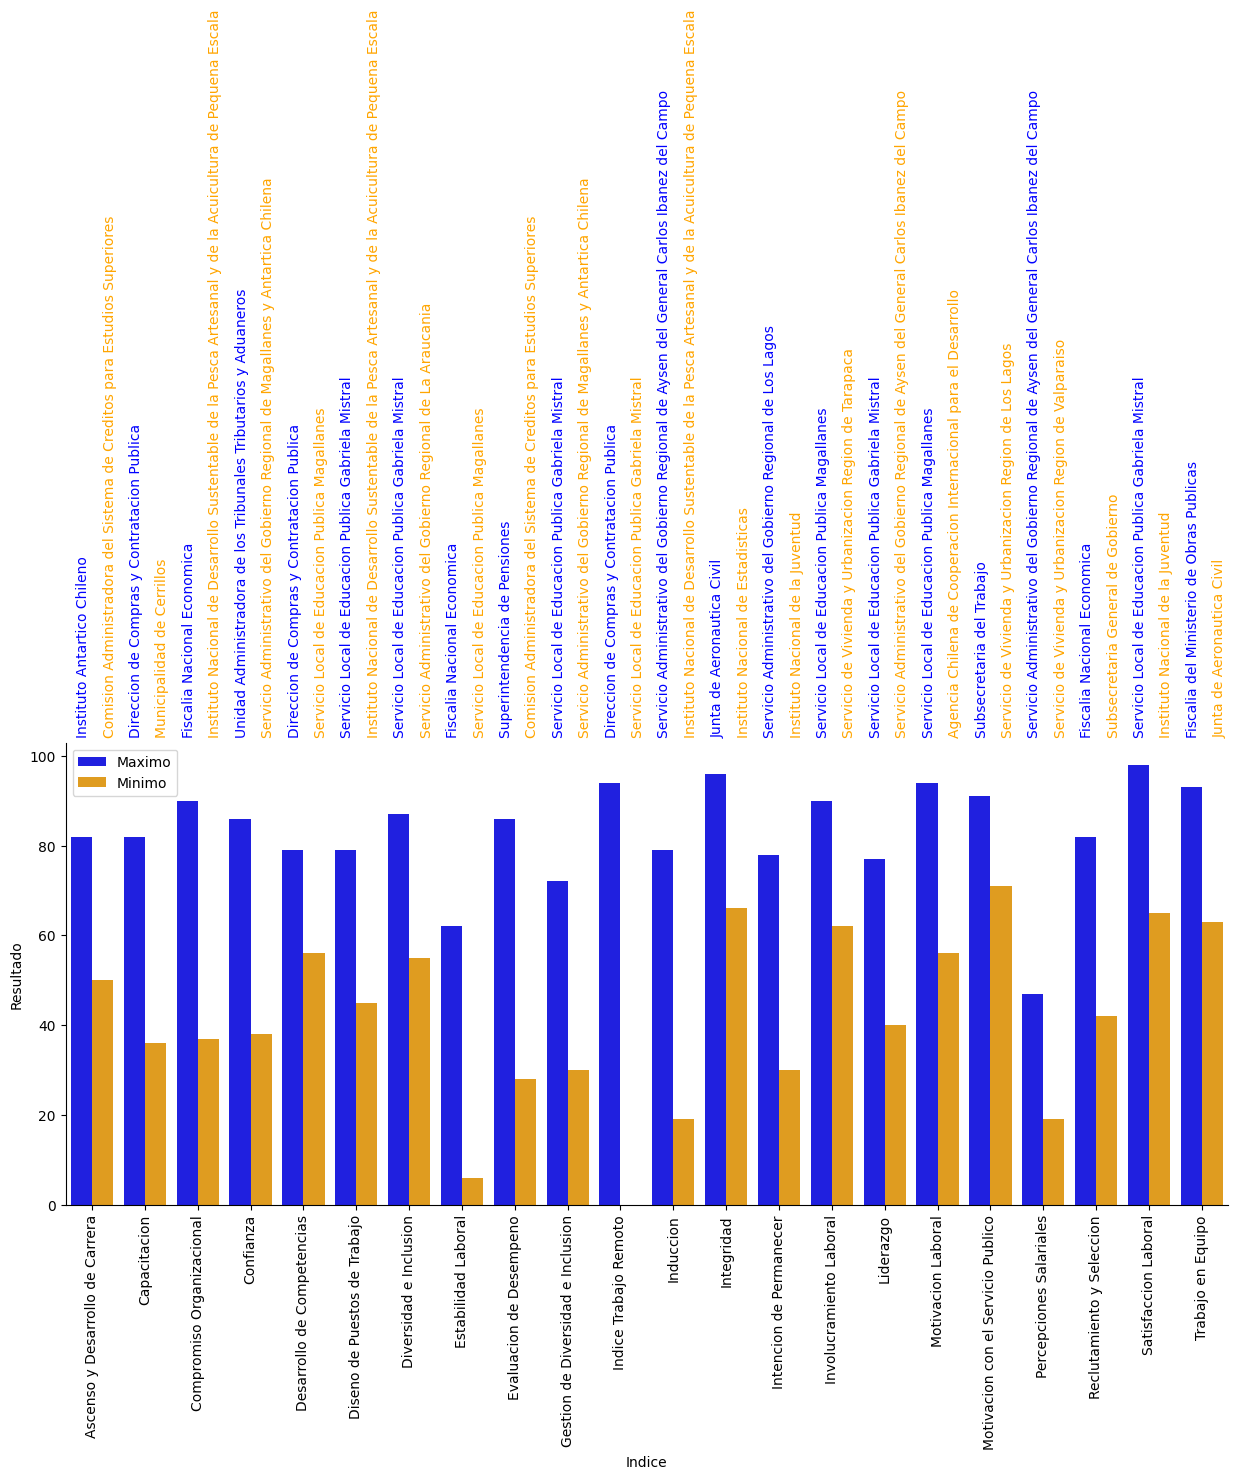

In [14]:
# Definir un diccionario de colores para las categorías
categoria_colors = {
    'Minimo': 'orange',
    'Maximo': 'blue'
}

# Crear una lista de colores basada en la paleta definida en category_colors
colors = [categoria_colors[c] for c in df_max_min['Categoria'].unique()]

plt.figure(figsize=(15, 6))
sns.barplot(x='Indice', y='Resultado', data=df_max_min,hue='Categoria',palette=colors)
plt.xticks(rotation=90)
# Agregar etiquetas
for index, row in df_max_min.iterrows():
    plt.annotate(row['Servicio'],
                 xy=(row['Row_number'], 100),
                 xytext=(0, 15),
                 textcoords='offset points',
                 #color='blue',
                 color=categoria_colors[row['Categoria']],  # Color basado en la categoría
                 rotation=90)
plt.legend(loc='best')
# Eliminar las líneas de enmarcado
sns.despine()
plt.show()

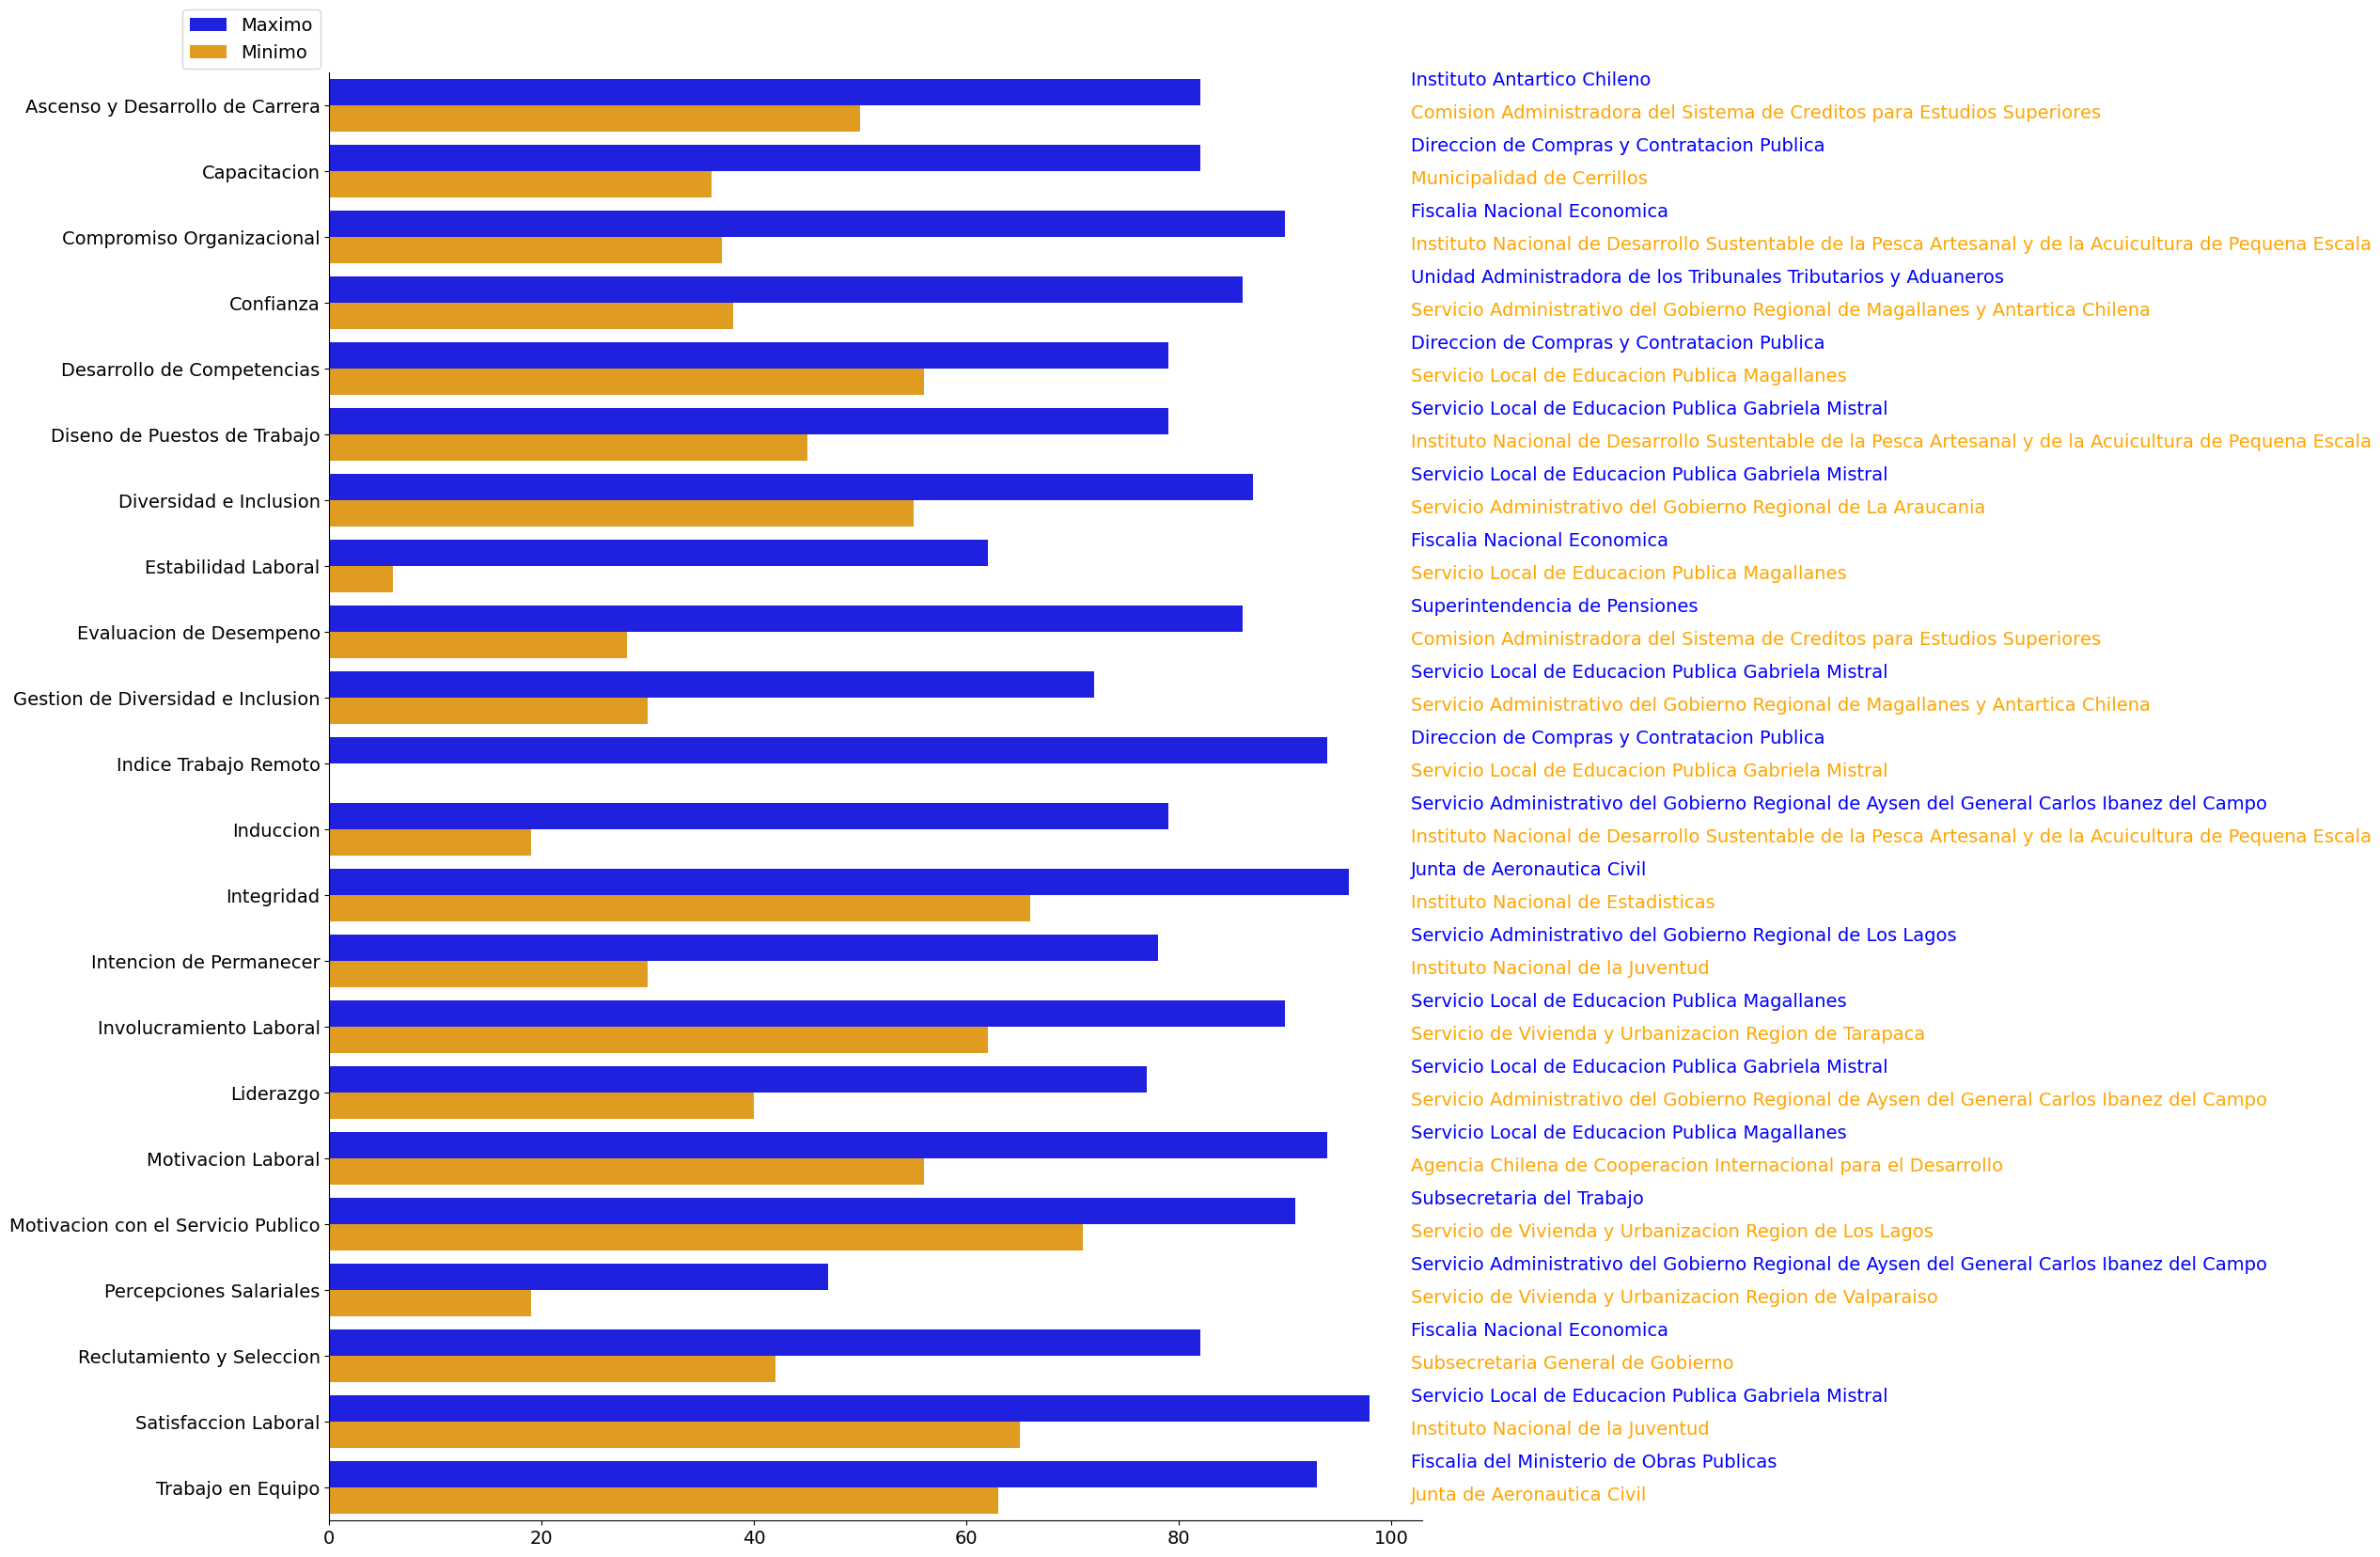

In [16]:
# Definir un diccionario de colores para las categorías
categoria_colors = {
    'Minimo': 'orange',
    'Maximo': 'blue'
}

# Crear una lista de colores basada en la paleta definida en category_colors
colors = [categoria_colors[c] for c in df_max_min['Categoria'].unique()]

plt.figure(figsize=(15, 20))
sns.barplot(y='Indice', x='Resultado', data=df_max_min,hue='Categoria',palette=colors)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('')
plt.xlabel('')
#plt.yticks(rotation=90)
# Agregar etiquetas
for index, row in df_max_min.iterrows():
    plt.annotate(row['Servicio'],
                 #xy=(0,row['Row_number']),
                 xy=(100,row['Row_number']),
                 xytext=(15,0),
                 textcoords='offset points',
                 fontsize=14,
                 color=categoria_colors[row['Categoria']],)  # Color basado en la categoría
plt.legend(bbox_to_anchor=(0, 1.05),fontsize=14)
# Eliminar las líneas de enmarcado
sns.despine()
plt.show()

## gráfico de comparacion por rango etario

## gráfico de comparacion por género

In [ ]:
df[df['Indice']=='Compromiso Organizacional']['Indicador'].unique()


array(['Compromiso Organizacional',
       'Siento una fuerte pertenencia a mi servicio',
       'Recomendaria mi servicio como un buen lugar para trabajar'],
      dtype=object)

In [ ]:
df.query("Servicio=='Servicio Agricola y Ganadero' & Indice=='Compromiso Organizacional' & Tipo=='Indice'")

,Servicio,Caracteristica de Comparacion,Valor de la Caracteristica de Comparacion,Indice,Indicador,Tipo,Resultado,Codificacion
199080,Servicio Agricola y Ganadero,Todos,Todos,Compromiso Organizacional,Compromiso Organizacional,Indice,72,Indice
199195,Servicio Agricola y Ganadero,Genero,Femenino,Compromiso Organizacional,Compromiso Organizacional,Indice,70,Indice
199196,Servicio Agricola y Ganadero,Genero,Masculino,Compromiso Organizacional,Compromiso Organizacional,Indice,75,Indice
199425,Servicio Agricola y Ganadero,Edad,Personas de mas edad (40+ anos),Compromiso Organizacional,Compromiso Organizacional,Indice,76,Indice
199426,Servicio Agricola y Ganadero,Edad,Personas mas jovenes (<40 anos),Compromiso Organizacional,Compromiso Organizacional,Indice,66,Indice
199655,Servicio Agricola y Ganadero,Anos de servicio publico,Personas con mayor antiguedad en el servicio (...,Compromiso Organizacional,Compromiso Organizacional,Indice,74,Indice
199656,Servicio Agricola y Ganadero,Anos de servicio publico,Personas con menor antiguedad en el servicio (...,Compromiso Organizacional,Compromiso Organizacional,Indice,66,Indice
199869,Servicio Agricola y Ganadero,Nivel educativo,Personas con titulo universitario,Compromiso Organizacional,Compromiso Organizacional,Indice,72,Indice
199870,Servicio Agricola y Ganadero,Nivel educativo,Personas sin titulo universitario,Compromiso Organizacional,Compromiso Organizacional,Indice,73,Indice
200099,Servicio Agricola y Ganadero,Tipo de contrato,Codigo del Trabajo,Compromiso Organizacional,Compromiso Organizacional,Indice,63,Indice


In [ ]:
df.query("Servicio=='Servicio Agricola y Ganadero' & Indice=='Compromiso Organizacional' & Tipo!='Indice'")

,Servicio,Caracteristica de Comparacion,Valor de la Caracteristica de Comparacion,Indice,Indicador,Tipo,Resultado,Codificacion
199081,Servicio Agricola y Ganadero,Todos,Todos,Compromiso Organizacional,Siento una fuerte pertenencia a mi servicio,Indicador,75,% de encuestados que selecciona opciones de ac...
199082,Servicio Agricola y Ganadero,Todos,Todos,Compromiso Organizacional,Recomendaria mi servicio como un buen lugar pa...,Indicador,70,% de encuestados que selecciona opciones de ac...
199197,Servicio Agricola y Ganadero,Genero,Femenino,Compromiso Organizacional,Siento una fuerte pertenencia a mi servicio,Indicador,73,% de encuestados que selecciona opciones de ac...
199198,Servicio Agricola y Ganadero,Genero,Masculino,Compromiso Organizacional,Siento una fuerte pertenencia a mi servicio,Indicador,77,% de encuestados que selecciona opciones de ac...
199199,Servicio Agricola y Ganadero,Genero,Femenino,Compromiso Organizacional,Recomendaria mi servicio como un buen lugar pa...,Indicador,66,% de encuestados que selecciona opciones de ac...
199200,Servicio Agricola y Ganadero,Genero,Masculino,Compromiso Organizacional,Recomendaria mi servicio como un buen lugar pa...,Indicador,74,% de encuestados que selecciona opciones de ac...
199427,Servicio Agricola y Ganadero,Edad,Personas de mas edad (40+ anos),Compromiso Organizacional,Siento una fuerte pertenencia a mi servicio,Indicador,80,% de encuestados que selecciona opciones de ac...
199428,Servicio Agricola y Ganadero,Edad,Personas mas jovenes (<40 anos),Compromiso Organizacional,Siento una fuerte pertenencia a mi servicio,Indicador,66,% de encuestados que selecciona opciones de ac...
199429,Servicio Agricola y Ganadero,Edad,Personas de mas edad (40+ anos),Compromiso Organizacional,Recomendaria mi servicio como un buen lugar pa...,Indicador,72,% de encuestados que selecciona opciones de ac...
199430,Servicio Agricola y Ganadero,Edad,Personas mas jovenes (<40 anos),Compromiso Organizacional,Recomendaria mi servicio como un buen lugar pa...,Indicador,65,% de encuestados que selecciona opciones de ac...


# Valores

In [ ]:
df.Servicio.value_counts()

Servicio
Todos                                               2284
Subsecretaria del Medio Ambiente                    2284
Subsecretaria de Servicios Sociales                 2284
Municipalidad de Cerrillos                          2284
Servicio Agricola y Ganadero                        2284
                                                    ... 
Servicio Local de Educacion Publica Andalien Sur    1832
Servicio Local de Educacion Publica Magallanes      1832
Subsecretaria de Educacion Parvularia               1832
Subsecretaria de Prevision Social                   1824
Subsecretaria de Defensa                            1824
Name: count, Length: 128, dtype: int64

In [ ]:
df['Caracteristica de Comparacion'].unique()

array(['Todos', 'Genero', 'Edad', 'Anos de servicio publico',
       'Nivel educativo', 'Tipo de contrato', 'Estamento',
       'Situacion de discapacidad', 'Pertenencia a pueblos originarios'],
      dtype=object)